In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
import keras
import sys
sys.path.insert(0, '../')

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

Using TensorFlow backend.


1.11.0


### Import the MNIST dataset/ Preprocess the data

In [7]:
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
import ipdb
ipdb.set_trace()
print('Yeah!')
n, img_rows, img_cols = x_train.shape

--Return--
None
> <ipython-input-24-e5e494d63cbe>(2)<module>()
      1 import ipdb
----> 2 ipdb.set_trace()
      3 print('Yeah!')

ipdb> n
> /Users/adhyyan/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py(2913)run_code()
   2912                 # Reset our crash handler in place
-> 2913                 sys.excepthook = old_excepthook
   2914         except SystemExit as e:



In [9]:
num_classes = 10

In [10]:
D = img_rows * img_cols

In [11]:
x_train_flattened = x_train.reshape(n, D)
x_test_flattened = x_test.reshape(x_test.shape[0], D)

In [12]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [13]:
y_train[0:5, :]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

### Train and test the network on MNIST

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Dropout, Flatten

In [15]:
from adv_util import create_fully_connected

In [16]:
input_shape = (D, )
num_classes = 10

In [17]:
def compile_train_test(x_train, y_train, x_test, y_test, reg, corrupt_func = None):
    model = create_fully_connected(input_shape = input_shape, num_classes = num_classes, reg = reg)
    model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
    
    print("Reg value:" + str(reg))
    
    
    """
    #Fit regular data
    model.fit(x_train_flattened, y_train, batch_size=128, epochs=15, verbose=True, validation_split=.1)
    loss_regular, accuracy_regular  = model.evaluate(x_test_flattened, y_test, verbose=False)
    print('Test accuracy on regular' + str(accuracy_regular))
    """

    
    #Fit corrupted data
    x_train_corrupt = corrupt_data(x_train, int(np.round(0.2*x_train.shape[0])), corrupt_func)
    x_train_corrupt_flat = x_train_corrupt.reshape(n, D)
    model.fit(x_train_corrupt_flat, y_train, batch_size=128, epochs=15, verbose=True, validation_split=.1)
    loss_corrupt, accuracy_corrupt  = model.evaluate(x_test_flattened, y_test, verbose=False)
    
    print('Test accuracy on corrupt' + str(accuracy_corrupt))
    
    return loss_regular, accuracy_regular, loss_corrupt, accuracy_corrupt

# Blurring

In [18]:
from mnist_corruption import gaussian_blurring, corrupt_data

In [19]:
x_small = x_train[0:3]

x_corrupted_small = gaussian_blurring(x_small, 2)
x_corrupted_reshaped = x_corrupted_small.reshape((x_corrupted_small.shape[0], 784))

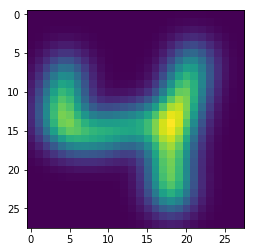

In [20]:
plt.imshow(x_corrupted_small[2])

In [19]:
model.predict(x_corrupted_reshaped)

NameError: name 'model' is not defined

In [59]:
x_corrupted_reshaped[0].shape

(784,)

## Stability and Generalization

In [21]:
from adv_util import create_fully_connected

In [22]:
reg = 0.01
compile_train_test(x_train, y_train, x_test, y_test, reg, gaussian_blurring)

TypeError: create_fully_connected() got an unexpected keyword argument 'reg'